In [1]:
#!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [2]:
symbol = input().upper()

AAPL


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima.arima import auto_arima
import warnings 
warnings.filterwarnings('ignore') 
# Đọc dữ liệu từ file CSV
#path_csv = '/content/drive/MyDrive/price_stock_prediction/data/historical_price_with_indicators/{symbol}.csv'
path_csv = f'D:/Project/Python/Jupyter/price_stock_prediction/data/historical_price_with_indicators/{symbol}.csv'
df = pd.read_csv(path_csv)
# Chuyển đổi cột 'Date' thành kiểu ngày tháng
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
# Lọc dữ liệu trong chính DataFrame
df = df[df['Date'] >= '2015-01-01']
df = df.reset_index(drop=True)
df.head()


,Date,Close,Volume,Open,High,Low,RSI,MACD,Signal_Line,MACD_Diff,MA_20,Upper_Band,Lower_Band
0,2015-01-02,27.3325,212575080,27.8475,27.8600,26.8375,42.594008,-0.041860,0.028710,-0.070570,27.959250,29.097428,26.821072
1,2015-01-05,26.5625,256843520,27.0725,27.1625,26.3525,36.102208,-0.148033,-0.006639,-0.141394,27.843750,29.058004,26.629496
2,2015-01-06,26.5650,262729000,26.6350,26.8575,26.1575,36.136241,-0.229330,-0.051177,-0.178153,27.734500,28.997635,26.471365
3,2015-01-07,26.9375,159933400,26.8000,27.0500,26.6737,41.164628,-0.260695,-0.093081,-0.167615,27.676375,28.975177,26.377573
4,2015-01-08,27.9725,236675040,27.3075,28.0375,27.1750,52.383107,-0.199735,-0.114411,-0.085323,27.648500,28.892956,26.404044


In [4]:
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
df['Date'] = df['Date'].apply(str_to_datetime)
df.index = df.pop('Date')
df

,Close,Volume,Open,High,Low,RSI,MACD,Signal_Line,MACD_Diff,MA_20,Upper_Band,Lower_Band
Date,,,,,,,,,,,,
2015-01-02,27.3325,212575080,27.8475,27.8600,26.8375,42.594008,-0.041860,0.028710,-0.070570,27.959250,29.097428,26.821072
2015-01-05,26.5625,256843520,27.0725,27.1625,26.3525,36.102208,-0.148033,-0.006639,-0.141394,27.843750,29.058004,26.629496
2015-01-06,26.5650,262729000,26.6350,26.8575,26.1575,36.136241,-0.229330,-0.051177,-0.178153,27.734500,28.997635,26.471365
2015-01-07,26.9375,159933400,26.8000,27.0500,26.6737,41.164628,-0.260695,-0.093081,-0.167615,27.676375,28.975177,26.377573
2015-01-08,27.9725,236675040,27.3075,28.0375,27.1750,52.383107,-0.199735,-0.114411,-0.085323,27.648500,28.892956,26.404044
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-17,182.6800,47317430,181.2700,182.9300,180.3000,36.709375,-1.925628,-1.208079,-0.717548,188.797000,199.399490,178.194510
2024-01-18,188.6300,78005750,186.0900,189.1400,185.8300,51.588581,-1.562076,-1.278879,-0.283197,188.434000,198.497406,178.370594
2024-01-19,191.5600,68902990,189.3300,191.9500,188.8200,56.955152,-1.025708,-1.228244,0.202537,188.165000,197.534776,178.795224


In [5]:
ts = df
ts

,Close,Volume,Open,High,Low,RSI,MACD,Signal_Line,MACD_Diff,MA_20,Upper_Band,Lower_Band
Date,,,,,,,,,,,,
2015-01-02,27.3325,212575080,27.8475,27.8600,26.8375,42.594008,-0.041860,0.028710,-0.070570,27.959250,29.097428,26.821072
2015-01-05,26.5625,256843520,27.0725,27.1625,26.3525,36.102208,-0.148033,-0.006639,-0.141394,27.843750,29.058004,26.629496
2015-01-06,26.5650,262729000,26.6350,26.8575,26.1575,36.136241,-0.229330,-0.051177,-0.178153,27.734500,28.997635,26.471365
2015-01-07,26.9375,159933400,26.8000,27.0500,26.6737,41.164628,-0.260695,-0.093081,-0.167615,27.676375,28.975177,26.377573
2015-01-08,27.9725,236675040,27.3075,28.0375,27.1750,52.383107,-0.199735,-0.114411,-0.085323,27.648500,28.892956,26.404044
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-17,182.6800,47317430,181.2700,182.9300,180.3000,36.709375,-1.925628,-1.208079,-0.717548,188.797000,199.399490,178.194510
2024-01-18,188.6300,78005750,186.0900,189.1400,185.8300,51.588581,-1.562076,-1.278879,-0.283197,188.434000,198.497406,178.370594
2024-01-19,191.5600,68902990,189.3300,191.9500,188.8200,56.955152,-1.025708,-1.228244,0.202537,188.165000,197.534776,178.795224


In [6]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_df = ts[(ts.index >= '2015-01-01') & (ts.index <= '2019-12-31')]
val_df = ts[(ts.index >= '2020-01-01') & (ts.index <= '2021-12-31')]
test_df = ts[(ts.index >= '2022-01-01') & (ts.index <= '2023-12-31')]

In [7]:
train_data = train_df['Close']
val_data = val_df['Close']
test_data = test_df['Close']
model = auto_arima(train_data,seasonal = True, m = 5,trace = True, error_action = 'ignore',suppress_warning = True)
fitted = model.fit(train_data)
print(fitted.summary())
p, d, q = model.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=2378.833, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=2373.763, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=2376.351, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=2376.349, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=2376.134, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=2374.427, Time=0.11 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=2374.437, Time=0.13 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=2376.427, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=2375.657, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=2375.643, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=2377.390, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5] intercept
Total fit time: 2.778 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1

In [8]:
def arima_model(history, y, order):
    predictions = []
    model_fit = None
    for i in tqdm(range(len(y))):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        result = model_fit.forecast()[0]
        predictions.append(result)
        history.append(y[i])
    return predictions, model_fit.summary() if model_fit else None

In [9]:
from tqdm import tqdm
# ARIMA Model Prediction
order = (p, d, q)
history = [x for x in train_data]

predictions, report_model = arima_model(history, val_data,order)



100%|██████████| 505/505 [00:11<00:00, 45.25it/s]


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# Evaluation Metrics
mse = mean_squared_error(val_data, predictions)
mae = mean_absolute_error(val_data, predictions)
rmse = math.sqrt(mse)

# Display Metrics
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)

# Optionally, print the ARIMA model summary
print(report_model)

MSE: 5.868027512376238
MAE: 1.7860148514851486
RMSE: 2.4224011873296787
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1762
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3090.754
Date:                Sun, 03 Mar 2024   AIC                           6183.508
Time:                        16:08:11   BIC                           6188.982
Sample:                             0   HQIC                          6185.531
                               - 1762                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.9588      0.028     70.883      0.000       1.905       2.013
Ljung-Box (L1) (Q):                  15.01   Jarque-Bera (J

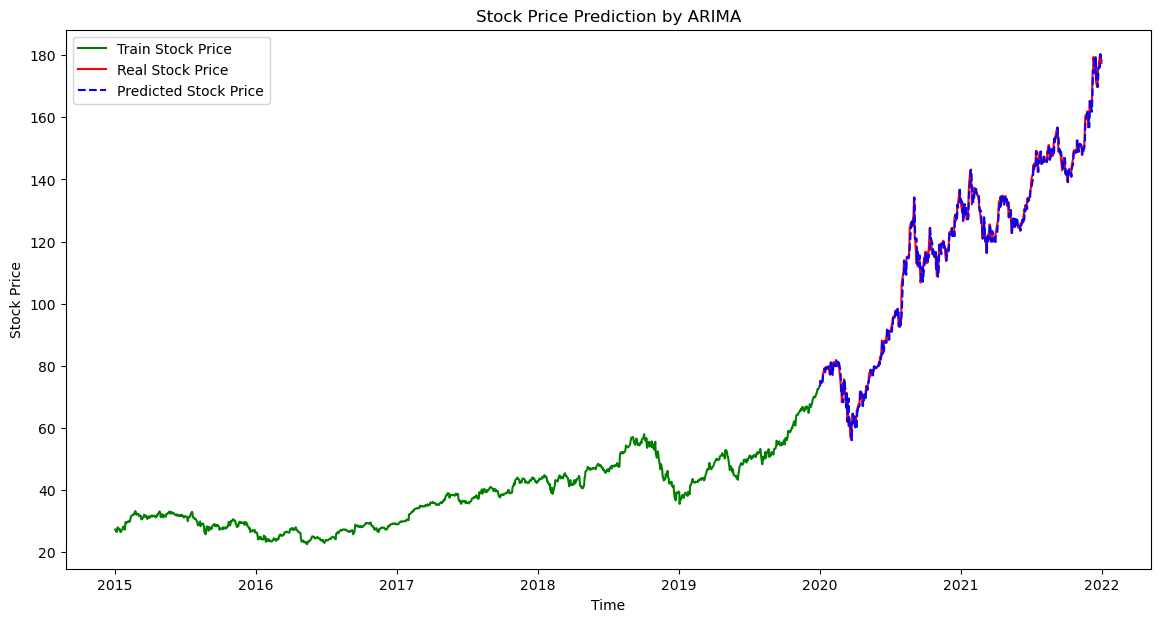

In [11]:
import matplotlib.pyplot as plt

# Prepare the data
train_dates = train_df.index
train_close_prices = train_df['Close']

valid_dates = val_df.index
valid_close_prices = val_df['Close']


# Ensure that the length of predictions and valid_dates are the same
min_length = min(len(predictions), len(valid_dates))

# Create the plot
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train_dates, train_close_prices, color='green', label='Train Stock Price')

# Plot actual valid data
plt.plot(valid_dates, valid_close_prices, color='red', label='Real Stock Price')

# Plot predicted valid data
plt.plot(valid_dates[:min_length], predictions[:min_length], color='blue', linestyle='--', label='Predicted Stock Price')

# Add titles and labels
plt.title('Stock Price Prediction by ARIMA')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Show legend
plt.legend()

# Display the plot
plt.show()



In [12]:
test_dates = test_df.index
test_close_prices = test_df['Close']

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm

def arima_model(history, y, order, seasonal_order=None):
    predictions = []
    model_fit = None
    for i in tqdm(range(len(y))):
        if seasonal_order:
            model = ARIMA(history, order=order, seasonal_order=seasonal_order)
        else:
            model = ARIMA(history, order=order)
        model_fit = model.fit()
        result = model_fit.forecast()[0]
        predictions.append(result)
        history.append(y[i])
    return predictions, model_fit.summary() if model_fit else None


In [14]:
from tqdm import tqdm
# ARIMA Model Prediction
combined_data = pd.concat([train_data, val_data])
model = auto_arima(combined_data,seasonal = True, m = 5,trace = True, error_action = 'ignore',suppress_warning = True)
fitted = model.fit(combined_data)
print(fitted.summary())
p, d, q = model.order
P, D, Q, m = model.seasonal_order
seasonal_order = (P, D, Q, m)
order = (p,d,q)
history = [x for x in combined_data]
predictions_test, report_model_test = arima_model(history, test_data,order, seasonal_order)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[5]             : AIC=inf, Time=0.84 sec
 ARIMA(0,2,0)(0,0,0)[5]             : AIC=7552.439, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[5]             : AIC=6911.921, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[5]             : AIC=inf, Time=0.36 sec
 ARIMA(1,2,0)(0,0,0)[5]             : AIC=6910.157, Time=0.04 sec
 ARIMA(1,2,0)(0,0,1)[5]             : AIC=6911.921, Time=0.09 sec
 ARIMA(1,2,0)(1,0,1)[5]             : AIC=6913.922, Time=0.10 sec
 ARIMA(2,2,0)(0,0,0)[5]             : AIC=6715.376, Time=0.07 sec
 ARIMA(2,2,0)(1,0,0)[5]             : AIC=6716.755, Time=0.13 sec
 ARIMA(2,2,0)(0,0,1)[5]             : AIC=6716.761, Time=0.11 sec
 ARIMA(2,2,0)(1,0,1)[5]             : AIC=6718.748, Time=0.12 sec
 ARIMA(3,2,0)(0,0,0)[5]             : AIC=6596.219, Time=0.09 sec
 ARIMA(3,2,0)(1,0,0)[5]             : AIC=6597.066, Time=0.17 sec
 ARIMA(3,2,0)(0,0,1)[5]             : AIC=6597.075, Time=0.17 sec
 ARIMA(3,2,0)(1,0,1)[5]             : AIC=6

100%|██████████| 501/501 [04:49<00:00,  1.73it/s]


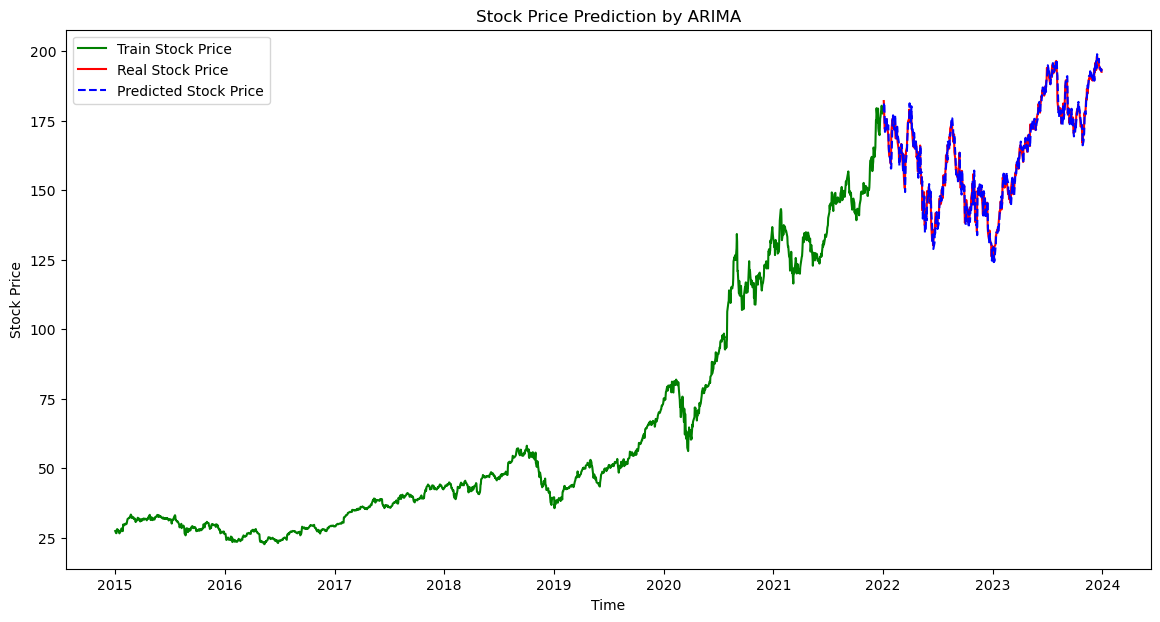

In [15]:
import matplotlib.pyplot as plt

# Prepare the data
train_dates = train_df.index
train_close_prices = train_df['Close']

test_dates = test_df.index
test_close_prices = test_df['Close']

combined_dates = combined_data.index
combined_close_prices = combined_data

min_length_test = min(len(predictions_test),len(test_dates))
# Create the plot
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(combined_dates, combined_close_prices, color='green', label='Train Stock Price')


plt.plot(test_dates, test_close_prices, color='red', label='Real Stock Price')

# Plot predicted valid data
plt.plot(test_dates[:min_length_test], predictions_test[:min_length_test], color='blue', linestyle='--', label='Predicted Stock Price')

# Add titles and labels
plt.title('Stock Price Prediction by ARIMA')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Show legend
plt.legend()

# Display the plot
plt.show()



In [16]:
# Evaluation Metrics
mse = mean_squared_error(test_data, predictions_test)
mae = mean_absolute_error(test_data, predictions_test)
rmse = math.sqrt(mse)

# Display Metrics
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)

# Optionally, print the ARIMA model summary
print(report_model_test)

MSE: 9.193585064091664
MAE: 2.3198252544030113
RMSE: 3.032092522350145
                                    SARIMAX Results                                    
Dep. Variable:                               y   No. Observations:                 2263
Model:             ARIMA(4, 2, 0)x(2, 0, 0, 5)   Log Likelihood               -4672.098
Date:                         Sun, 03 Mar 2024   AIC                           9358.197
Time:                                 16:13:14   BIC                           9398.262
Sample:                                      0   HQIC                          9372.817
                                        - 2263                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9143      0.011    -84.704      0.000      -0.935 